# **Project: Titanic - Machine Learning from Disaster**

link: https://www.kaggle.com/c/titanic

<div style="text-align: center;">
  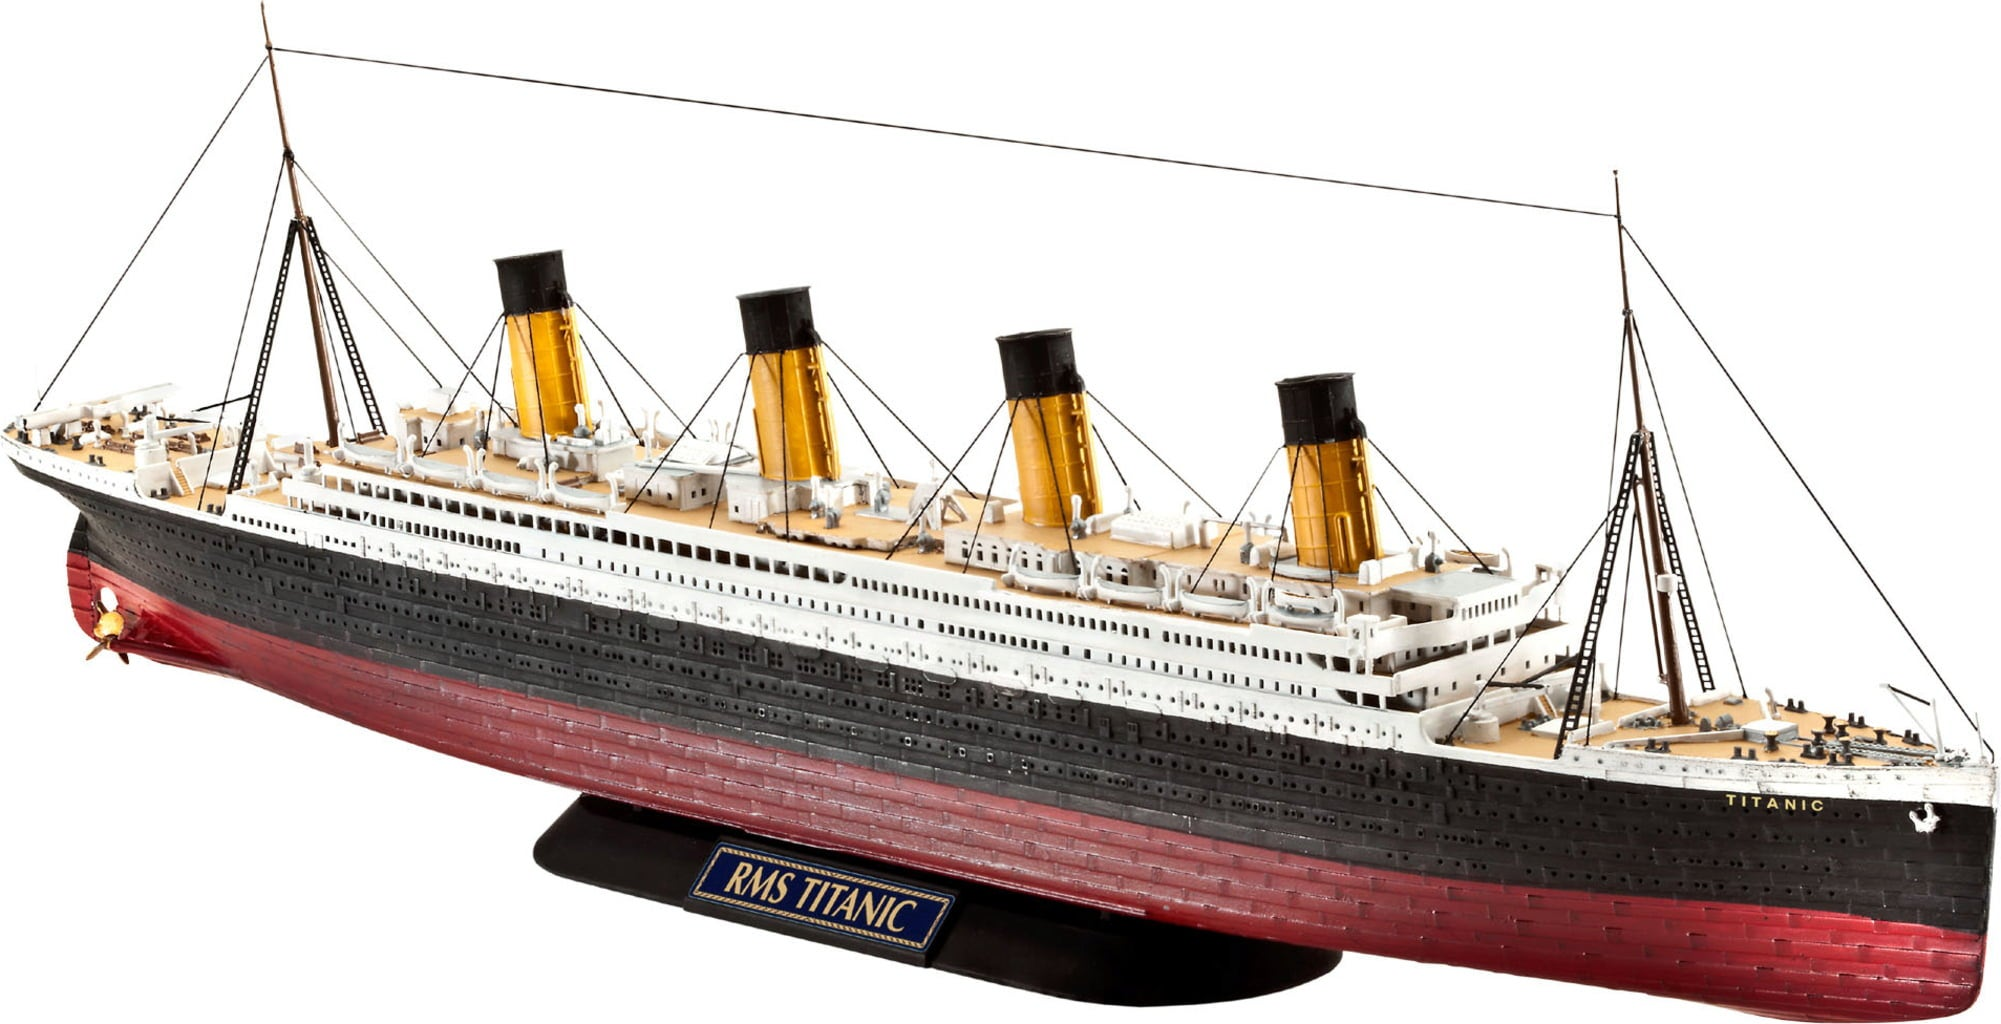
</div>

# **Table of Contents**
* [1. Introduction](#introduction)
* [2. Loading the data](#loading-data)
* [3. Exploratory Data Analysis (EDA)](#eda)
* [4. Feature Engineering & Data Wrangling](#fe-dw)
* [5. Model Training](#model-training)

# **1. Introduction** <a class="anchor" id="introduction"></a>
The Titanic - Machine Learning from Disaster competition is a flagship challenge offered by Kaggle. It's often the first project recommended for beginners in machine learning, as it allows them to familiarize themselves with the basics of predictive modeling and how the platform works.

The goal of the challenge is simple: to predict which passengers survived the sinking of the Titanic based on data such as age, gender, social class, and even name.

The Titanic sank on April 15, 1912, during its very first voyage, after hitting an iceberg. Of the 2,224 people on board, 1,502 died, largely because there were not enough lifeboats. Although chance played a role in survival, some profiles were more likely to survive than others. The goal of this project is to use this data to train a machine learning model capable of predicting the probability of survival for each passenger.


# **2. Loading the data** <a class="anchor" id="loading-data"></a>

In [1]:
# import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
train_df = pd.read_csv('./data/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
test_df = pd.read_csv('./data/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Set PassengerId column as new index

In [66]:
train_df.set_index('PassengerId', inplace=True)

In [67]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test_df.set_index('PassengerId', inplace = True)

In [69]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2.1. Feature Classification: Categorical vs Numerical
* This helps us select the appropriate plots for visualization.

### Which features are categorical?

* Categorical Features: 'nominal', ordinal', 'ratio', 'interval'
* To classify the samples into sets of similar samples

### Which features are numerical?
* Numerical features: 'discrete', 'continous' or 'timeseries'
* These values change from sample to sample

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


# Analysis of data
* Categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch
* Numerical: Age, Fare
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Float, Int

## 2.2 Change data type

In [72]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [73]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [74]:
features = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


# Distribution of Numerical feature values across the samples

In [76]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distribution of Categorical features

In [77]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# **3. Exploratory Data Analysis (EDA)** <a class="anchor" id="eda"></a>
### 3.1 Correlating categorical features
- categorical: 'Survived', 'sex', 'Embarked', 'Pclass' (ordinal), 'SibSp', 'Parch'

## Target Variable

In [78]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


- Remaining Categorical Feature Columns

In [79]:
print(train_df.dtypes)

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object


In [83]:
def convert_str (df, features):
    for feature in features:
       df[feature] = df[feature].astype('str') 
convert_str(train_df, features)

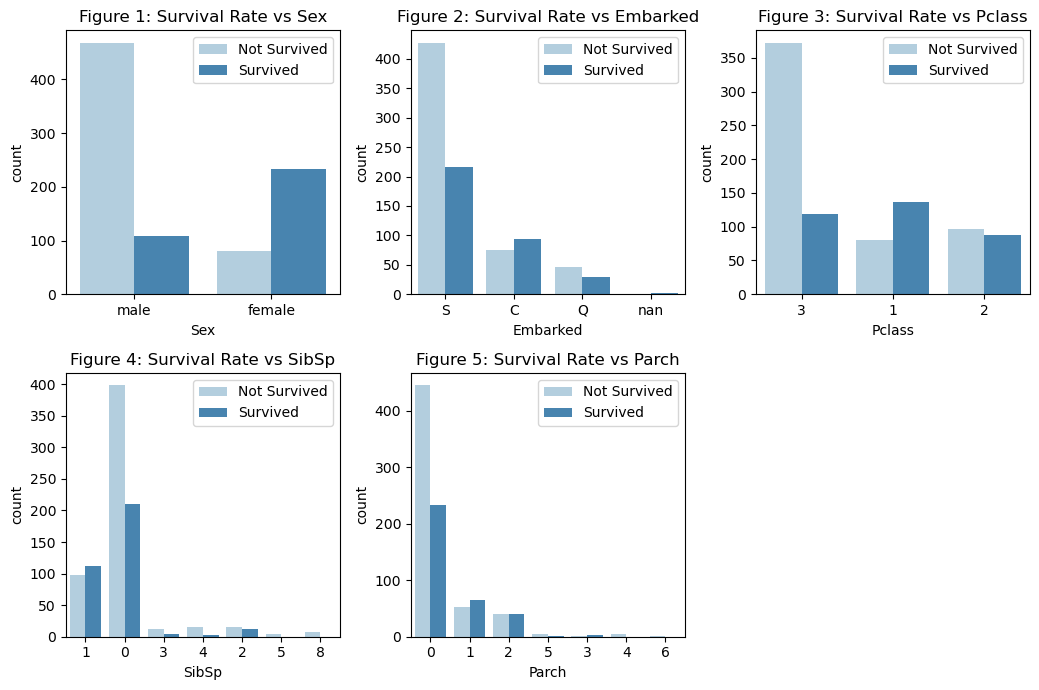

In [84]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5));

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) # Remove the last suplot
plt.tight_layout()
plt.show()

# Observation:
- Survival Rate:
  * Fig 1: Female survival rate > male
  * Fig 3: 1st class higher survival rate

## 3.2 EDA for Numerical Features
Numerical Features: Age, Fare

## Age

C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


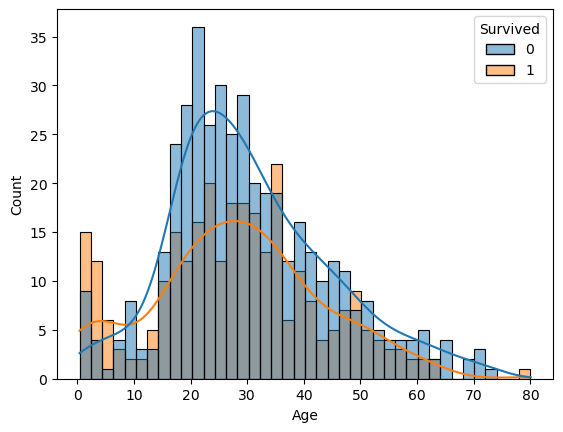

In [85]:
sns.histplot(data = train_df, x = 'Age',hue = 'Survived', bins = 40, kde = True);

- Majority passengers were from 18-40 ages
- Chilren had more chance to survive than other ages

## Fare

C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


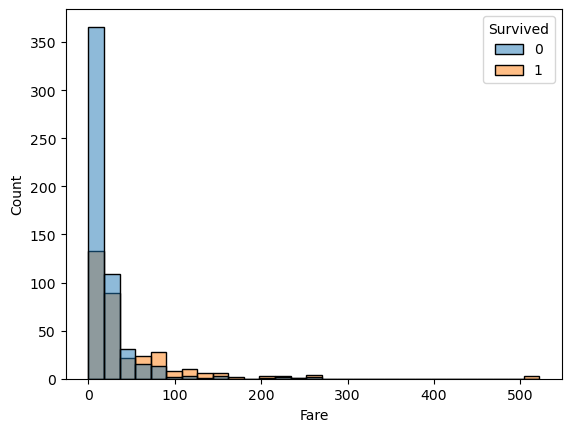

In [86]:
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', binwidth=18);

In [87]:
# To name for quartile
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)

C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


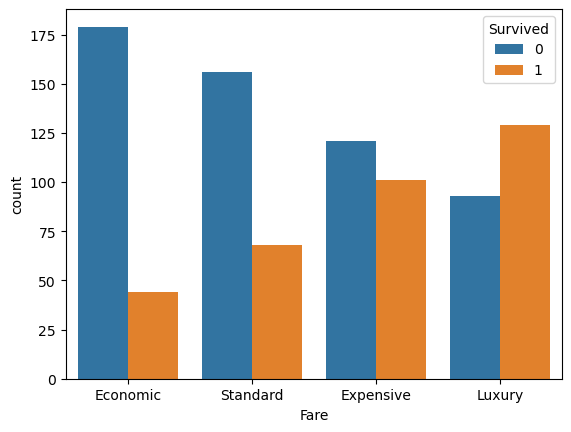

In [88]:
sns.countplot(x=quartile_data, hue = train_df['Survived']);

- Passenger with Luxury & Expensive Fare will have more chance to survive. This result is in agreement with Fig 3 Pclass.

# **4. Feature Engineering & Data Wrangling** <a class="anchor" id="fe-dw"></a>

**Name**
- Regular Expression (https://regex101.com/)

In [89]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [90]:
import re

def extract_title(name):
    # p = re.compile(r",(.+)\.")
    ##p = re.compile(r", (\w+)\.")
        ##if p.search(name) is None:
    ##    print(name)
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [91]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [92]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [93]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [94]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [95]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
    

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))

In [96]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64

In [97]:
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

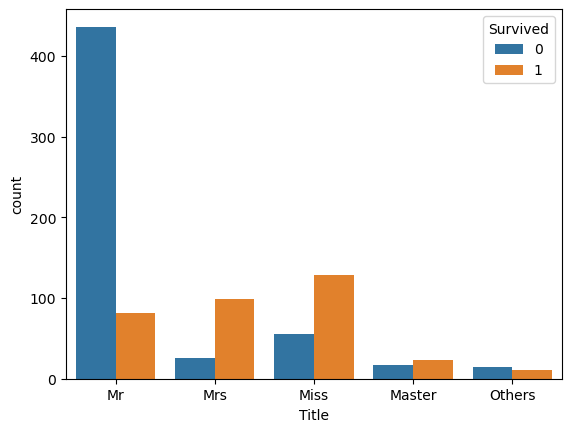

In [98]:
sns.countplot(data=train_df, x='Title', hue = 'Survived');

# **Family**
- SibSp, Parch

In [99]:
train_df['Family_Size'] = train_df['SibSp'].astype('int')+train_df['Parch'].astype('int') + 1

In [100]:
test_df['Family_Size'] = test_df['SibSp'].astype('int')+test_df['Parch'].astype('int') + 1

In [101]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small', 'Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo','Small', 'Medium','Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

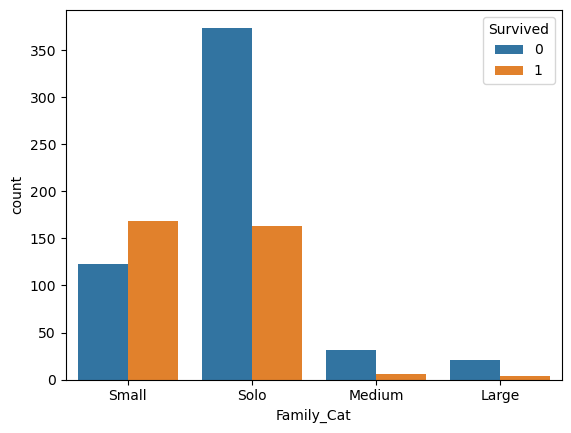

In [102]:
plot_df = train_df.reset_index()[['Family_Cat', 'Survived']].copy()
plot_df['Family_Cat'] = plot_df['Family_Cat'].astype(str)
plot_df['Survived'] = plot_df['Survived'].astype(str)
sns.countplot(data=plot_df, x='Family_Cat', hue='Survived')

# **4.2 Data Wrangling**

In [103]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [104]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")

In [105]:
display_missing(train_df, feature_cols)

Col Age has 19.87% missing values.


In [106]:
display_missing(test_df, feature_cols)

Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### **Filling missing values**

### Age
- Filling missng values with `median` of whole dataset

In [107]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

In [108]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [115]:
# Filling the missing values in Age with the medians of Sex and Pclass groups

train_df['Age']=train_df['Age'].fillna(train_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

In [118]:
test_df['Age']=test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform('median'))

**Pipeline of Sklearn**

In [142]:
X = train_df[feature_cols]
y = train_df['Survived']

In [143]:
X_test = test_df[feature_cols]

In [144]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())  
])

cat_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

In [145]:
preprocessor = ColumnTransformer (transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [146]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [148]:
X = preprocessor.transform(X) # X-> X_train, X_val

In [149]:
X_test = preprocessor.transform(X_test)

# **5. Model Training** <a class="anchor" id="model-training"></a>

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [153]:
X_train.shape, X_val.shape, X_test.shape

((712, 20), (179, 20), (418, 20))

In [183]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [159]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [160]:
log_reg.score(X_val, y_val)

0.8603351955307262

In [161]:
y_pred = log_reg.predict(X_val)

In [163]:
precision_score(y_val, y_pred, pos_label='1'), recall_score(y_val, y_pred, pos_label='1')

(0.8142857142857143, 0.8260869565217391)

In [168]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.81      0.83      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [180]:
poly = PolynomialFeatures(degree=3) # test 2, 3, 4 ...
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [181]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [182]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8659217877094972

In [192]:
#Decision Tree
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, random_state=2025)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2025)

In [193]:
decision_tree.score(X_val, y_val)

0.7932960893854749

### 5.1 Cross-validation

In [194]:
from sklearn.model_selection import cross_val_score

In [207]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)

In [208]:
lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [209]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [210]:
dt_sv = DecisionTreeClassifier(criterion = 'entropy', max_depth=8, random_state=2025)

In [211]:
dt_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [212]:
dt_scores.mean(), dt_scores.std()

(0.826031008725127, 0.020466357172416235)

### 5.2 Baseline Model Comparison
link: https://scikit-learn.org/stable/machine_learning_map.html  

In [214]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 0.5/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 0.8/150.0 MB 4.8 MB/s eta 0:00:32
   ---------------------------------------- 1.2/150.0 MB 5.4 MB/s eta 0:00:28
   ---------------------------------------- 1.7/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 2.1/150.0 MB 6.6 MB/s eta 0:00:23
    --------------------------------------- 2.5/150.0 MB 7.2 MB/s eta 0:00:21
    --------------------------------------- 2.9/150.0 MB 7.5 MB/s eta 0:00:20
    --------------------------------------- 3.3/150.0 MB 7.2 MB/s eta 0:00:21
    --------------------------------------- 3.7/150.0 MB 7.5 MB/s eta 0:00:20
   - -------------------------------------- 4.2/150.0 MB 7.6 MB/s eta 0:00:20


In [215]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #!pip install xgboost

In [221]:
seed = 2025
models = [
    LinearSVC(max_iter=12000, random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [233]:
y=y.astype(int)

In [238]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metric='accuracy', cv=5, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metric, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
   
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True);
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean','Standard Deviation']

    #sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results

In [239]:
generate_baseline_results(models, X, y, metric='accuracy', cv = 5, plot_results=False)

C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\T-H Nguyen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not use

,Mean,Standard Deviation
model_name,,
SVC,0.832791,0.023442
LinearSVC,0.831668,0.020817
LogisticRegression,0.827173,0.022475
GradientBoostingClassifier,0.818197,0.023538
XGBClassifier,0.812604,0.047238
AdaBoostClassifier,0.810363,0.030780
KNeighborsClassifier,0.810351,0.027097
RandomForestClassifier,0.799153,0.043951
ExtraTreesClassifier,0.783447,0.045138
